# Heart Failure Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\USER\\Downloads\\heart.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().mean()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [6]:
df_summary=df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
def draw_axvline(plt, col):
    mean = df_summary.loc["mean", col]
    q1 = df_summary.loc["25%", col]
    q2 = df_summary.loc["50%", col]
    q3 = df_summary.loc["75%", col]
    plt.axvline(mean, color = "g");
    plt.axvline(q1, color = "b");
    plt.axvline(q2, color = "navy");
    plt.axvline(q3, color = "purple");
    plt.legend({"Mean": mean, "25%":q1, "50%":q2, "75%":q3});

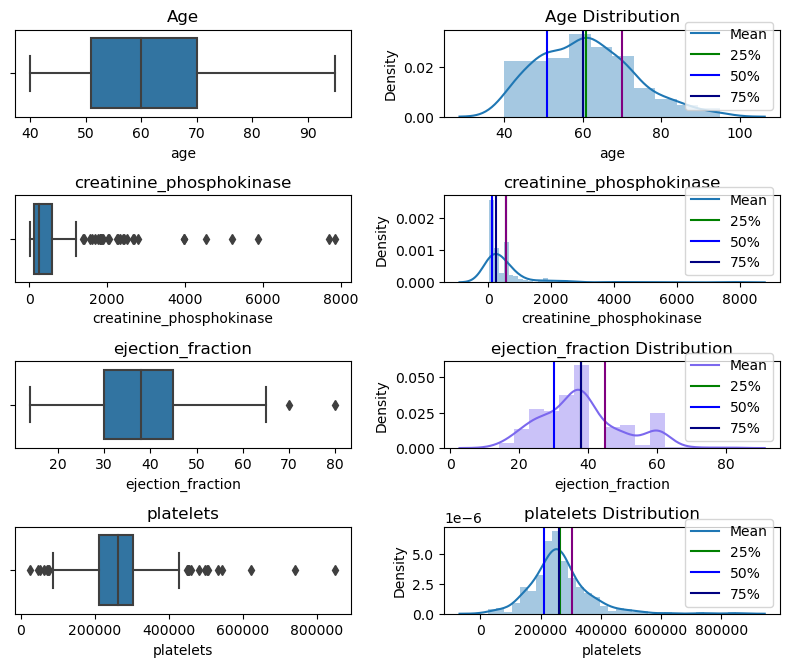

In [8]:
plt.figure(figsize=(8,8))

plt.subplot(521)
plt.title("Age")
sns.boxplot(df.age)

plt.subplot(522);
plt.title("Age Distribution")
h=sns.distplot(df.age)
draw_axvline(h, "age")

plt.subplot(523)
plt.title("creatinine_phosphokinase")
sns.boxplot(df.creatinine_phosphokinase)

plt.subplot(524);
plt.title("creatinine_phosphokinase")
h=sns.distplot(df.creatinine_phosphokinase)
draw_axvline(h, "creatinine_phosphokinase")

plt.subplot(525)
plt.title("ejection_fraction")
sns.boxplot(df.ejection_fraction)

plt.subplot(526);
plt.title("ejection_fraction Distribution")
h=sns.distplot(df.ejection_fraction, color = "mediumslateblue")
draw_axvline(h, "ejection_fraction")

plt.subplot(527)
plt.title("platelets")
sns.boxplot(df.platelets)


plt.subplot(528);
plt.title("platelets Distribution")
h=sns.distplot(df.platelets)
draw_axvline(h, "platelets")

plt.tight_layout()
plt.show()

In [9]:
bin_col=["anaemia", "diabetes","high_blood_pressure","sex","smoking"]

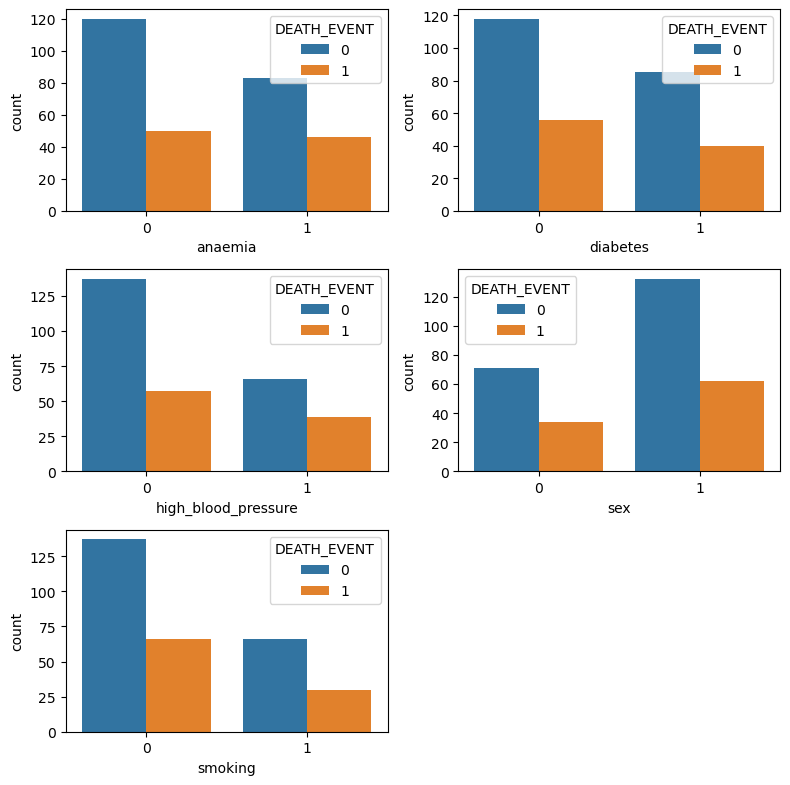

In [10]:
a=3
b=2
c=1
plt.figure(figsize=(8,8))
for i in bin_col:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.countplot(df[i], hue=df["DEATH_EVENT"])
    c=c+1
plt.tight_layout()
plt.show()

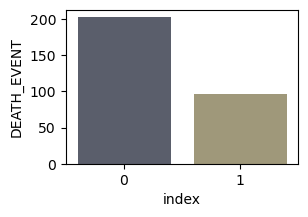

In [11]:
plt.figure(figsize=(3,2))
xx = df["DEATH_EVENT"].value_counts().reset_index()
sns.barplot(x="index", y="DEATH_EVENT", data=xx, palette="cividis")
plt.show()

In [12]:
col_names=df.columns[:-1]

In [13]:
target_col=df["DEATH_EVENT"]

In [14]:
x=df[col_names]
y=target_col

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
oversample=SMOTE()

In [17]:
x,y=(oversample.fit_resample(x,y))

In [18]:
df_final=pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)

In [19]:
df_final.columns=df.columns

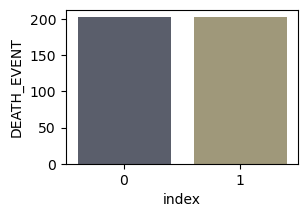

In [20]:
plt.figure(figsize=(3,2))
xx = df_final["DEATH_EVENT"].value_counts().reset_index()
sns.barplot(x="index", y="DEATH_EVENT", data=xx, palette="cividis")
plt.show()

In [21]:
num_col=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std=StandardScaler()

In [24]:
scaled=std.fit_transform(df_final[num_col])

In [25]:
scaled=pd.DataFrame(scaled, columns=num_col)

In [26]:
bin_cols=["anaemia", "diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

In [27]:
bin_cols=pd.DataFrame(df_final[bin_cols], columns=bin_cols)

In [28]:
df_train=pd.concat([scaled, bin_cols],axis=1)

In [29]:
df_train.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.101085,-0.011736,-1.406064,0.026932,0.284875,-1.389135,-1.449916,0,0,1,1,0,1
1,-0.578075,7.411872,0.130577,0.009493,-0.383639,-0.019122,-1.423375,0,0,0,1,0,1
2,0.261505,-0.456398,-1.406064,-1.067033,-0.216510,-1.617471,-1.410104,0,0,0,1,1,1
3,-0.997865,-0.492093,-1.406064,-0.557224,0.284875,0.209214,-1.410104,1,0,0,1,0,1
4,0.261505,-0.442120,-1.406064,0.685435,0.953389,-4.585834,-1.396834,1,1,0,0,0,1


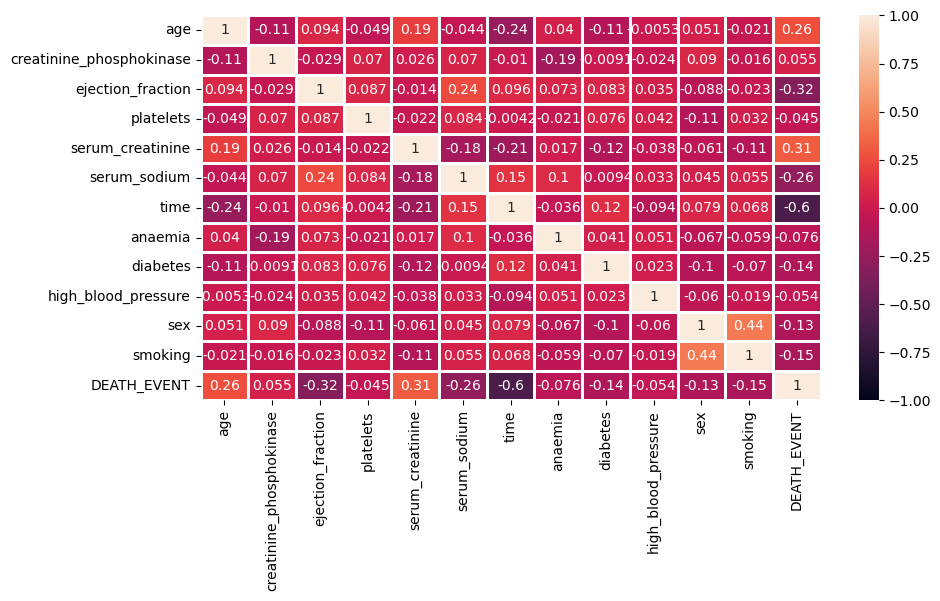

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt='.2g', linewidth=1);

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
ex=ExtraTreesClassifier()

In [33]:
X=df_train.drop(["DEATH_EVENT"], axis=1)
Y=df_train.DEATH_EVENT

In [34]:
ex.fit(X,Y)

ExtraTreesClassifier()

In [35]:
print(ex.feature_importances_)

[0.0860353  0.0657949  0.13082333 0.06750274 0.11110205 0.08086931
 0.31626531 0.02484363 0.02946152 0.0295576  0.0274228  0.03032151]


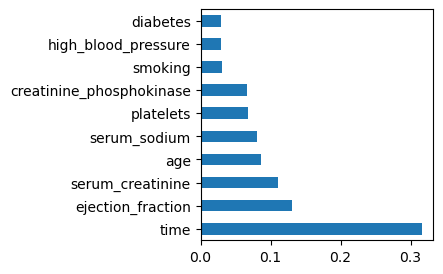

In [36]:
plt.figure(figsize=(3,3))
feature_importance=pd.Series(ex.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
feature=['age','serum_creatinine','ejection_fraction','time']

In [38]:
xx=df_train[feature]
yy=df_train['DEATH_EVENT']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2, random_state=42)

In [40]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC(probability=True)
}

In [41]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)

model trained with LogisticRegression
Model accuracy on train is::  0.8333333333333334
Model accuracy on test is::  0.8658536585365854
confusion_matrix train is::  [[134  28]
 [ 26 136]]
confusion_matrix test is::  [[34  7]
 [ 4 37]]
Wrong Predictions made: 11 / 82
************************************************************
model trained with DecisionTreeClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.7804878048780488
confusion_matrix train is::  [[162   0]
 [  0 162]]
confusion_matrix test is::  [[31 10]
 [ 8 33]]
Wrong Predictions made: 18 / 82
************************************************************
model trained with RandomForestClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8658536585365854
confusion_matrix train is::  [[162   0]
 [  0 162]]
confusion_matrix test is::  [[35  6]
 [ 5 36]]
Wrong Predictions made: 11 / 82
************************************************************
model trained with KNeighborsClassifier
M

Model used is::  LogisticRegression()


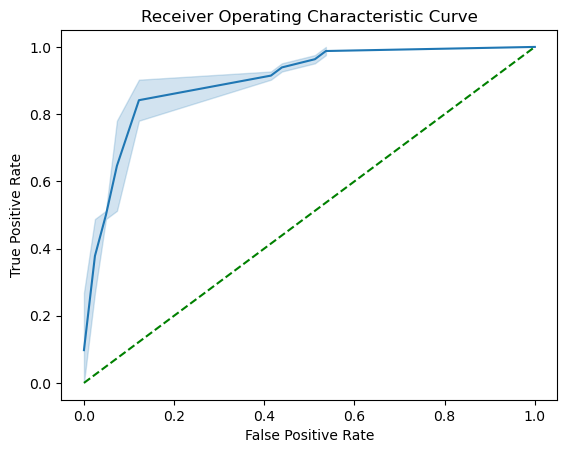

Model used is::  DecisionTreeClassifier()


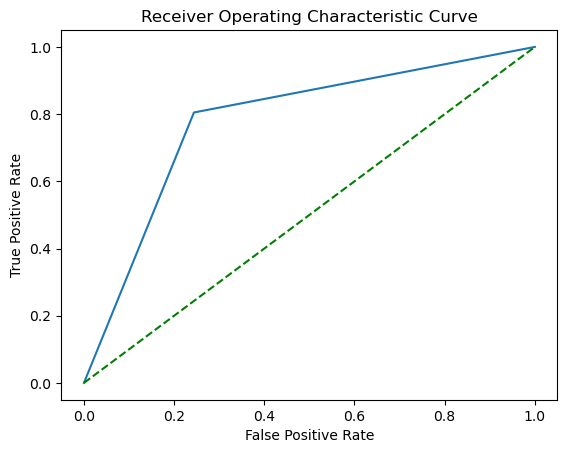

Model used is::  RandomForestClassifier()


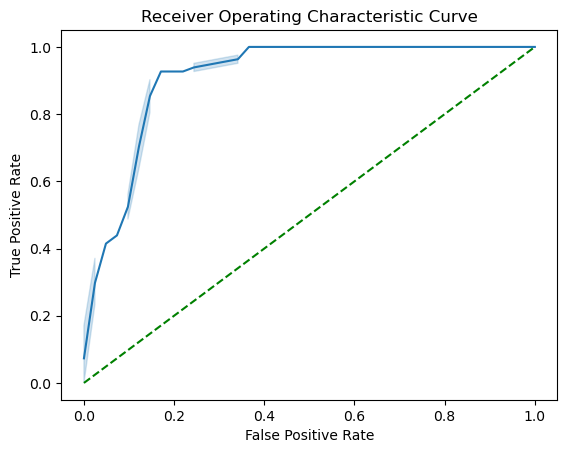

Model used is::  KNeighborsClassifier()


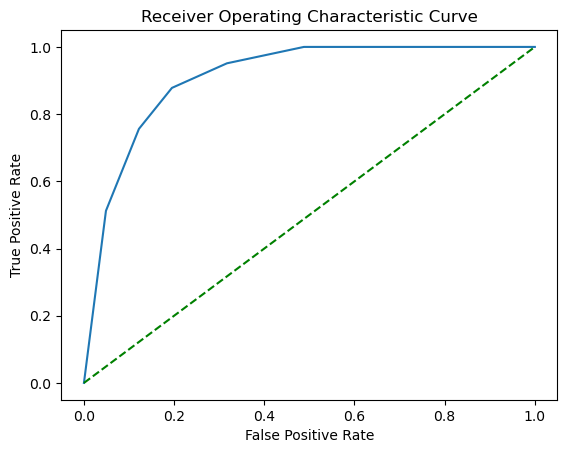

Model used is::  SVC(probability=True)


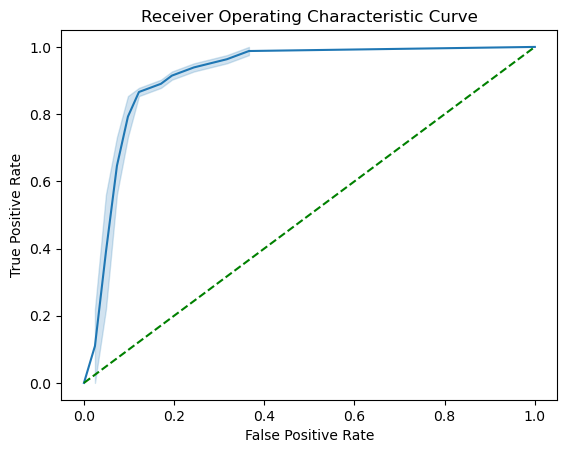

In [42]:
for name, model in models.items():
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()